# 卡方分布

随机变量X服从标准正态分布，$X～N(0,1)$ $E[X]=0$ $var(X)=1$ 

从这个正态分布中抽取样本

定义随机变量$Q_{1}=X^2$，则随机变量$Q_{1}$服从自由度为1的卡方分布，$Q_{1}～\chi_{1}^2$，DF=1

定义随机变量$Q_{2}=X_{1}^2+X_{2}^2$，则随机变量$Q_{2}$服从自由度为2的卡方分布，$Q_{2}～\chi_{2}^2$，DF=2



In [1]:
import numpy as np
from scipy.special import gamma
from scipy import stats
import matplotlib.pyplot as plt

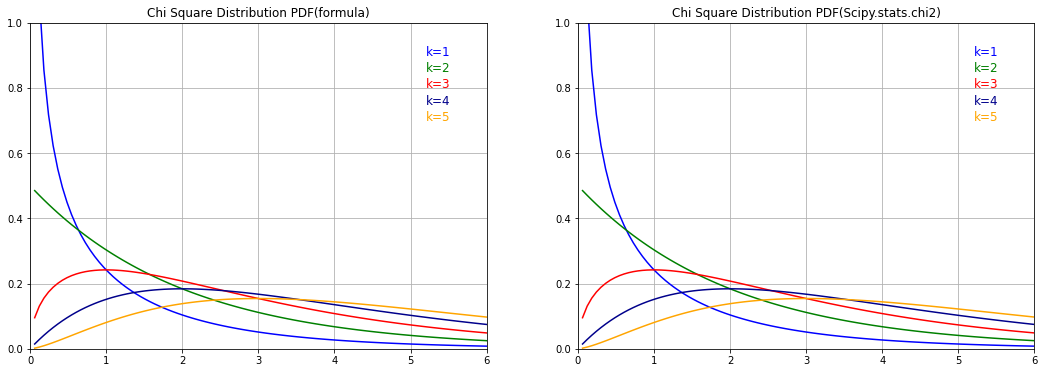

In [2]:
# 利用卡方分布概率密度函数公式和Scipy的卡方分布函数分别绘制概率密度函数曲线
x=np.linspace(0, 6, 100)
x=x[1:]
color = ["blue", "green", "red", "darkblue", "orange"]
fig=plt.figure(figsize=(18,6))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
for k in range(1,6,1):
    y1=((x**(k/2-1))*np.exp(-x/2))/((2**(k/2))*gamma(k/2))
    y2=stats.chi2.pdf(x, df=k)
    s="k="+str(k)
    ax1.plot(x, y1, c=color[int((k-1))])
    ax1.text(5.2, 0.95-k/20, s, size=12, color=color[int((k-1))])
    ax2.plot(x, y2, c=color[int((k-1))])
    ax2.text(5.2, 0.95-k/20, s, size=12, color=color[int((k-1))])
ax1.set_title(u"Chi Square Distribution PDF(formula)")
ax2.set_title(u"Chi Square Distribution PDF(Scipy.stats.chi2)")
ax1.set_xlim((0, 6))
ax2.set_xlim((0, 6))
ax1.set_ylim((0, 1))
ax2.set_ylim((0, 1))
ax1.grid(True)
ax2.grid(True)
plt.show()

# 卡方统计值假设校验

## 例题1

一家商店预期的用户分布情况如下：

|          | MON  | TUR  | THE  | WED  | FRI  | SAT  | SUM  |
| -------- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
| 预期分布 | 10%  | 10%  | 15%  | 20%  | 30%  | 15%  |      |
| 预期数   | 20   | 20   | 30   | 40   | 60   | 30   |      |
| 观测数   | 30   | 14   | 34   | 45   | 57   | 20   | 200   |

要验证商店的预期和实际观测情况是否吻合，我们进行假设校验

设置零假设H0：预期值是正确的；备择假设H1：预期值不正确；显著性水平$\alpha$=5%



In [3]:
# 用预期数与观测数差异的平方的标准化值之和，建立卡方统计量X2，X2=Σ(预期值-观测值)^2/预期值
expected=[20, 20, 30, 40, 60, 30]
observed=[30, 14, 34, 45, 57, 20]
X2=0
for i in range(len(expected)):
    X2=X2+(np.square(expected[i]-observed[i])/expected[i])
print("卡方统计量X2="+str(round(X2, 2)))

卡方统计量X2=11.44


In [4]:
# X2包含6个值的和，因为知道5个值后，第6个值可以通过总数计算出来，所以X2的自由度DF=6-1=5
# 要求显著性水平为5%，我们可以通过卡方分布表查询自由度为5时，显著性水平为0.05的临界值
df=5
X2_c=stats.chi2.isf(0.05, df)
print("满足显著水平为5%的卡方统计量临界值为："+str(round(X2_c, 2)))

满足显著水平为5%的卡方统计量临界值为：11.07


因为卡方统计量11.44大于临界值11.07，说明零假设成立时，观测值出现的可能性比显著性水平5%更低，所以我们可以拒绝零假设，而接受备择假设，认为商店预期的用户分布情况不正确。

## 例题2：列联表卡方检验

人们相信一些草药能预防感冒，在感冒季对3组人群做了试验

|          | Herb1  | Herb2  | Placebo  | Total  |
| -------- | ---- | ---- | ---- | ---- |
| Sick | 20  | 30  | 30  | 80   |
| Sick(expected) | 25.3  | 29.4  | 25.3  | 80   |
| Not Sick   | 100   | 110   | 90   | 300   |
| Not Sick(expected)   | 94.7   | 110.6   | 94.7   | 300   |
| Total   | 120   | 140   | 120   | 380   |

为了验证草药是否对预防感冒有效，我们进行假设检验

设置零假设H0：草药对预防感冒无效；备择假设：草药对预防感冒有效；显著性水平$\alpha$=10%

In [5]:
# 零假设成立时，服用草药的人群和服用安慰剂的人群在得感冒比例上应无差异，与整体测试人群的得感冒比例应无差异。
# 整体人群得感冒的比例为80/380=21%，由此可计算出各组的预期值
# 用预期数与观测数差异的平方的标准化值之和，建立卡方统计量X2，X2=Σ(预期值-观测值)^2/预期值
expected=[25.3, 29.4, 25.3, 94.7, 110.6, 94.7]
observed=[20, 30, 30, 100, 110, 90]
X2=0
for i in range(len(expected)):
    X2=X2+(np.square(expected[i]-observed[i])/expected[i])
print("卡方统计量X2="+str(round(X2, 2)))

卡方统计量X2=2.53


In [7]:
# 列联表的自由度经验公式为DF=(r-1)*(c-1)，本题中列联表为2行3列，则其自由度DF=(2-1)*(3-1)=2
# 要求显著性水平为10%，我们可以通过卡方分布表查询自由度为2时，显著性水平为0.1的临界值
df=2
X2_c=stats.chi2.isf(0.1, df)
print("满足显著水平为10%的卡方统计量临界值为："+str(round(X2_c, 2)))

满足显著水平为10%的卡方统计量临界值为：4.61


因为卡方统计量2.53远小于临界值4.61，说明零假设成立时，观测值出现的可能性比显著性水平10%要高，所以我们不能拒绝零假设，不能认为草药对预防感冒有效。